In [3]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from PIL import Image
import numpy as np
import torch
import json

In [4]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo
from pycocotools.coco import COCO
import skimage.io as io
import pylab

In [7]:
coco_predictions = torch.load('/data/sarthaka/maskrcnn-benchmark/inference/shapestack_val_fixed_cocostyle/coco_results.pth')
all_predictions = torch.load('/data/sarthaka/maskrcnn-benchmark/inference/shapestack_val_fixed_cocostyle/predictions.pth')

In [8]:
print(coco_predictions)

OrderedDict([('bbox', OrderedDict([('AP', 0.43886340114404176), ('AP50', 0.47463242795107574), ('AP75', 0.4638407140146051), ('APs', 0.2618137884751056), ('APm', 0.59252874377841), ('APl', -1.0)])), ('segm', OrderedDict([('AP', 0.4254532175246462), ('AP50', 0.4830901654052581), ('AP75', 0.47061898079338055), ('APs', 0.24362002538291685), ('APm', 0.5713363460013055), ('APl', -1.0)]))])


In [9]:
semg = '/data/sarthaka/maskrcnn-benchmark/inference/shapestack_val_fixed_cocostyle/segm.json'
with open(semg) as json_file:  
    data = json.load(json_file)

print(data[:5])

[{'image_id': 1, 'category_id': 1, 'segmentation': {'size': [224, 224], 'counts': 'ZUS19^69O010O0010O00010O010O001O01O01O010OZf9'}, 'score': 0.07297081500291824}, {'image_id': 1, 'category_id': 1, 'segmentation': {'size': [224, 224], 'counts': 'h_i01o61N100O10001O0O101O1O0O101O0O101N10001O00001O011lIE_5o00N100O2O0O100O10001N1O100O101N101O0O10Xe='}, 'score': 0.9998401403427124}, {'image_id': 1, 'category_id': 1, 'segmentation': {'size': [224, 224], 'counts': 'bg9`0_63N001N2O1O001O000O2O1O000O2O0108G1O00100O01O010O0010O01O001000O0001O1O01O000001O001O001O1O000O2O0O2O0O10001O1O0O2O0O101O001O0O2O1N1000000001O0000001O0O101N1O2O0O1O101N100O2O0O100O2O0O1O2O1NoWb0'}, 'score': 0.9999974966049194}, {'image_id': 1, 'category_id': 1, 'segmentation': {'size': [224, 224], 'counts': 'Se=e0[61N101O001O0O2O000000001N10001O001N10001O000O100000000000O0100000O10O0100000O010000O1000O01000O10O10000O0100000O10000O10O10O1000000O10000O10000O10000O1000000O2O000O10000O10001O0O101NWW?'}, 'score': 0.999975562095642

loading annotations into memory...
Done (t=1.26s)
creating index...
index created!
Custom COCO categories: 
jenga_block

Custom COCO supercategories: 
shape
{'id': 2166, 'file_name': 'env_jenga-h=8-id=03240-n=17-r=10/rgb-w=0-f=0-l=0-c=original-cam_12-r=10-mono-0.png', 'width': 224, 'height': 224, 'date_captured': '2019-04-29 02:54:28.818354', 'license': 1, 'coco_url': '', 'flickr_url': ''}


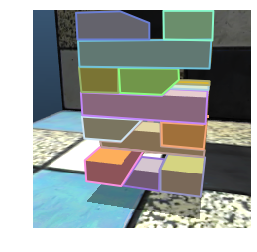

In [10]:
image_directory = '/data/sarthaka/maskrcnn-benchmark/datasets/shapestacks/jenga_recordings/'
annotation_file = '/data/sarthaka/maskrcnn-benchmark/datasets/shapestacks/instances_shapestacks_val_fixed_2018.json'

example_coco = COCO(annotation_file)

categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
rnum = np.random.randint(0, len(image_ids))
img_id = image_ids[rnum]
image_data = example_coco.loadImgs(img_id)[0]

print(image_data)

plt.figure()
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')

pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
# print('Image annotations : {}'.format(annotations))
example_coco.showAnns(annotations)


In [ ]:
from maskrcnn_benchmark.data import make_data_loader
from maskrcnn_benchmark.config import cfg
from tqdm import tqdm

    
cfgf = '/data/sarthaka/maskrcnn-benchmark/configs/shapestacks/e2e_mask_rcnn_R_50_FPN_2x_cocostyle.yaml'
cfg.merge_from_file(cfgf)
cfg.freeze()
data_loader = make_data_loader(
        cfg,
        is_train=False,
        is_distributed=False,
        start_iter=0,
    )

In [ ]:
!cd ..
for _, batch in enumerate(tqdm(data_loader)):
        images, targets, image_ids = batch

In [ ]:
!pwd